In [1]:
import json
import os
import nltk

datafiles = ['nus', 'semeval-2010', 'inspec']

datasets = {}
for dataset in datafiles:
    filename = dataset + '-standard.json'
    with open(filename) as f:
        stories = json.loads(f.read())
    datasets[dataset] = stories

nus


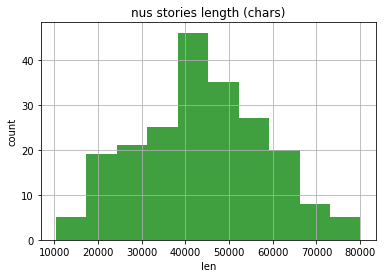

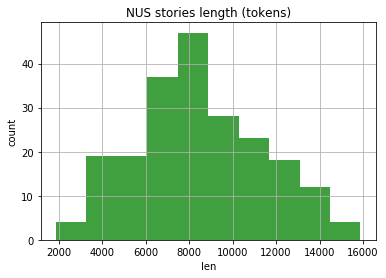

semeval-2010


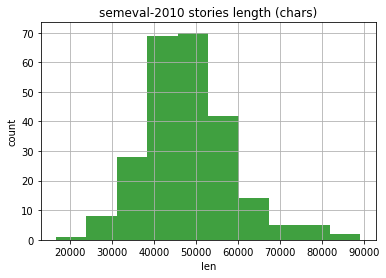

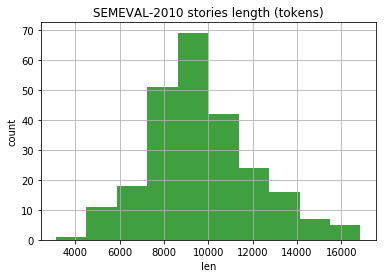

inspec


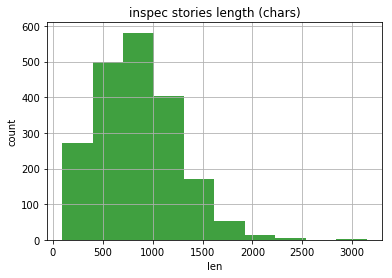

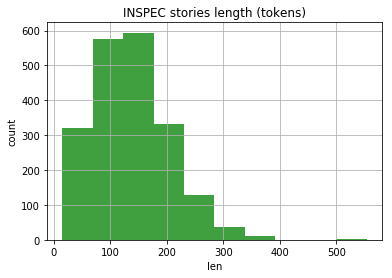

In [2]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

def plotHistogram(x, xlabel, ylabel, title):
     # the histogram of the data
    n, bins, patches = plt.hist(x, facecolor='green', alpha=0.75)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

for dataset, stories in datasets.items():
    print(dataset)
    charsNum = [len(story['headline']) + len(story['body']) for story in stories]
    plotHistogram(charsNum, xlabel='len', ylabel='count', title= dataset + ' stories length (chars)')
        
    tokensNum = []    
    for story in stories:
        story['content'] = story['headline'] + '\n' + story['body']
        tokens = nltk.word_tokenize(story['content'])
        story['tokens'] = tokens
        tokensNum.append(len(tokens))
    plotHistogram(tokensNum, xlabel='len', ylabel='count', title= dataset.upper() + ' stories length (tokens)')

stories num:  2000
CONTR 
Total: 9654, In abstract: 1958 (20.28)
UNCONTR 
Total: 22147, In abstract: 14047 (63.43)


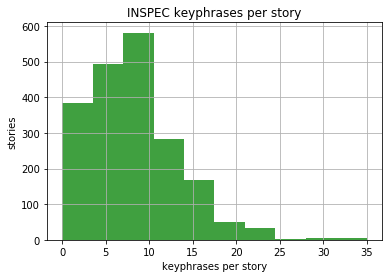

Keyphrases num
Min: 0
Max: 35
Median: 7.0

Story length (tokens)
Min: 15
Max: 554
Median: 132.0



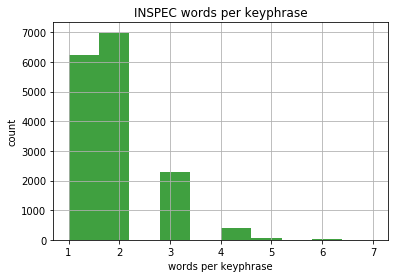

Grams/keyphrase
Min: 1, Max: 7, Median: 2.0



In [3]:
import numpy as np

# entities num
inspec = datasets['inspec']
name = 'inspec'

print('stories num: ', len(inspec))

labels = ['contr', 'uncontr']
total = {}
found = {}
for label in labels:
    total[label] = 0
    found[label] = 0
    
for story in inspec:
    for entity in story['entities']:
        total[entity['label']]+=1
        if len(entity['forms']) > 0:
            found[entity['label']]+=1

for label in labels:
    print(label.upper(), '\nTotal: %d, In abstract: %d (%.2f)' % (total[label], found[label], 100 * found[label] / total[label]))

    
entitiesNum = []
for story in inspec:
    entitiesNum.append(len([entity for entity in story['entities'] if len(entity['forms']) > 0]))
plotHistogram(entitiesNum, xlabel='keyphrases per story', ylabel='stories', title= name.upper() + ' keyphrases per story')

entitiesNum = np.array(entitiesNum)
print('Keyphrases num')
print('Min:', np.min(entitiesNum))
print('Max:', np.max(entitiesNum))
print('Median:', np.median(entitiesNum))
print('')

tokensNum = []
for story in stories:
    tokensNum.append(len(story['tokens']))
print('Story length (tokens)')
print('Min:', np.min(tokensNum))
print('Max:', np.max(tokensNum))
print('Median:', np.median(tokensNum))
print('')

nGrams = []
for story in stories:
    for entity in story['entities']:
        if len(entity['forms']) == 0:
            continue
            
        nGrams.append(len(nltk.word_tokenize(entity['id'])))
plotHistogram(nGrams, xlabel='words per keyphrase', ylabel='count', title = name.upper() + ' words per keyphrase')

print('Grams/keyphrase')
print('Min:', np.min(nGrams), end=', ')
print('Max:', np.max(nGrams), end=', ')
print('Median:', np.median(nGrams))
print('')


stories num:  211
Keyphrases: Total: 1653, Present: 834 (50.45)


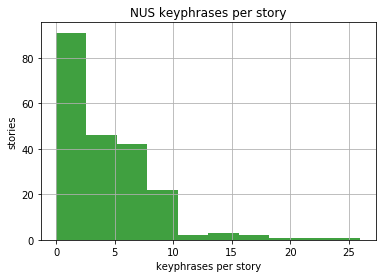

Keyphrases/document
Min: 0, Max: 26, Median: 4.0

Tokens/document:
Min: 1872, Max: 15881, Median: 8370.0



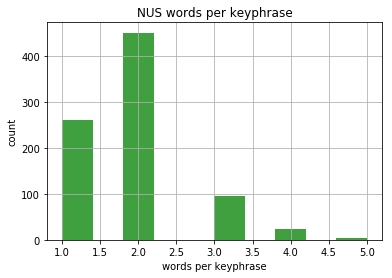

Grams/keyphrase
Min: 1, Max: 5, Median: 2.0



In [4]:
import numpy as np

# entities num
dataset = datasets['nus']
name = 'nus'

print('stories num: ', len(dataset))

total = 0
found = 0

for story in dataset:
    for entity in story['entities']:
        total+=1
        try:
            if len(entity['forms']) > 0:
                found+=1
        except:
            print(entity)
                    

print('Keyphrases: Total: %d, Present: %d (%.2f)' % (total, found, 100 * found / total))
    
entitiesNum = []
for story in dataset:
    entitiesNum.append(len([entity for entity in story['entities'] if len(entity['forms']) > 0]))
plotHistogram(entitiesNum, xlabel='keyphrases per story', ylabel='stories', title= name.upper() + ' keyphrases per story')

entitiesNum = np.array(entitiesNum)
print('Keyphrases/document')
print('Min:', np.min(entitiesNum), end=', ')
print('Max:', np.max(entitiesNum), end=', ')
print('Median:', np.median(entitiesNum))
print('')

tokensNum = []
for story in dataset:
    tokensNum.append(len(story['tokens']))
print('Tokens/document:')
print('Min:', np.min(tokensNum), end=', ')
print('Max:', np.max(tokensNum), end=', ')
print('Median:', np.median(tokensNum))
print('')

nGrams = []
for story in dataset:
    for entity in story['entities']:
        if len(entity['forms']) == 0:
            continue
            
        nGrams.append(len(nltk.word_tokenize(entity['id'])))
plotHistogram(nGrams, xlabel='words per keyphrase', ylabel='count', title = name.upper() + ' words per keyphrase')

print('Grams/keyphrase')
print('Min:', np.min(nGrams), end=', ')
print('Max:', np.max(nGrams), end=', ')
print('Median:', np.median(nGrams))
print('')


stories num:  244
AUTHOR 
Total: 947, Present: 603 (63.67)
READER 
Total: 3028, Present: 2037 (67.27)


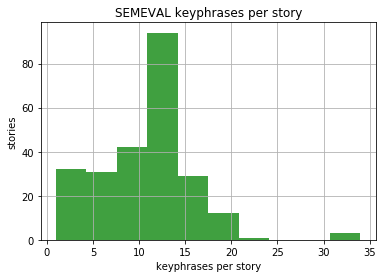

Keyphrases/document
Min: 1, Max: 34, Median: 11.0

Tokens/document:
Min: 3128, Max: 16866, Median: 9285.5



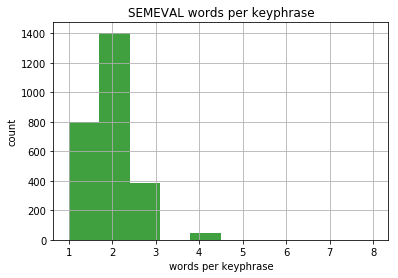

Grams/keyphrase
Min: 1, Max: 8, Median: 2.0



In [5]:
import numpy as np

# entities num
dataset = datasets['semeval-2010']
name = 'semeval'

print('stories num: ', len(dataset))

sources = ['author', 'reader']
total = {}
found = {}
for label in sources:
    total[label] = 0
    found[label] = 0
    
for story in dataset:
    for entity in story['entities']:
        total[entity['source']]+=1
        if len(entity['forms']) > 0:
            found[entity['source']]+=1

for label in sources:
    print(label.upper(), '\nTotal: %d, Present: %d (%.2f)' % (total[label], found[label], 100 * found[label] / total[label]))
                        
entitiesNum = []
for story in dataset:
    entitiesNum.append(len([entity for entity in story['entities'] if len(entity['forms']) > 0]))
plotHistogram(entitiesNum, xlabel='keyphrases per story', ylabel='stories', title= name.upper() + ' keyphrases per story')

entitiesNum = np.array(entitiesNum)
print('Keyphrases/document')
print('Min:', np.min(entitiesNum), end=', ')
print('Max:', np.max(entitiesNum), end=', ')
print('Median:', np.median(entitiesNum))
print('')

tokensNum = []
for story in dataset:
    tokensNum.append(len(story['tokens']))
print('Tokens/document:')
print('Min:', np.min(tokensNum), end=', ')
print('Max:', np.max(tokensNum), end=', ')
print('Median:', np.median(tokensNum))
print('')

nGrams = []
for story in dataset:
    for entity in story['entities']:
        if len(entity['forms']) == 0:
            continue
            
        nGrams.append(len(nltk.word_tokenize(entity['id'])))
plotHistogram(nGrams, xlabel='words per keyphrase', ylabel='count', title = name.upper() + ' words per keyphrase')

print('Grams/keyphrase')
print('Min:', np.min(nGrams), end=', ')
print('Max:', np.max(nGrams), end=', ')
print('Median:', np.median(nGrams))
print('')


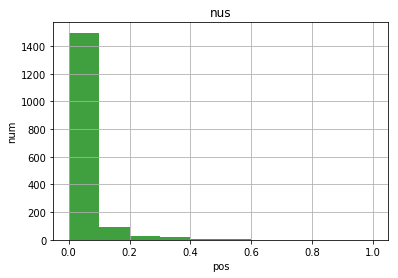

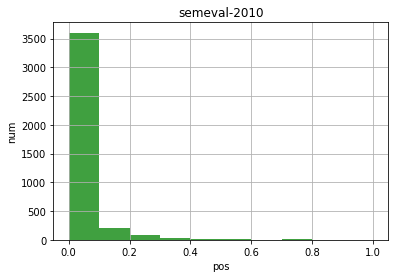

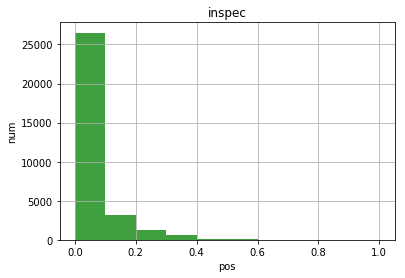

In [21]:
from sklearn.preprocessing import StandardScaler
import scipy as sp
import scipy.optimize
import math

def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y, maxfev=2000)
    A, K, C = opt_parms
    return A, K, C

A =  -0.256521830335
K =  1.41314037521
C =  1.28875489694
def exp_decay(t, A=A, K=K, C=C):
    return A * np.exp(K * t) + C

tokensMedian = {}
distributions = {}
for name, dataset in datasets.items():
    dist = []
    for story in dataset:
        for entity in story['entities']:
            curr_dist = []
            for form in entity['forms']:
                curr_dist = curr_dist + [10 / (math.log(offset+1) + 2) for (offset, tmp) in form['bodyOffsets'] + form['headOffsets']]
            dist.append(sum(curr_dist))
        tokensNum.append(len(story['tokens']))
        
    dist = dist / np.max(dist)
    plotHistogram(dist, xlabel='pos', ylabel='num', title=name)
   
   
#     for dist in dist_list:
#         plotHistogram(dist, xlabel='keyphrases locations', ylabel='count', title=name.upper() + ' keyphrase locations distribution')

In [7]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

n = len(distributions.items())
for i in range(n-1, -1, -1):
    for j in range(n-1, i, -1):
        xl, x = list(distributions.items())[j]
        yl, y = list(distributions.items())[i]
        x = np.array(x).reshape(-1, 1)
        y = np.array(y).reshape(-1, 1)
        print(xl, ' vs ', yl)
        distance, path = fastdtw(x, y, dist=euclidean)
        print('distance:', distance, end='\n\n')

ModuleNotFoundError: No module named 'fastdtw'